In [1]:
import os
os.chdir(r"C:\Users\debab\OneDrive\Desktop\Coustomer Churn\Notebooks")
print("Working directory:", os.getcwd())


Working directory: C:\Users\debab\OneDrive\Desktop\Coustomer Churn\Notebooks


# EDA — Customer Churn Dataset
Exploratory Data Analysis before model training.

## Step 1 — Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.dpi'] = 100

df = pd.read_csv('../Data/Customer-Churn-Records.csv')
print('Shape:', df.shape)
df.head()


Shape: (10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Step 2 — Data Cleaning

In [3]:
# Drop identifier columns and leakage column
df.drop(['RowNumber', 'CustomerId', 'Surname', 'Complain'], axis=1, inplace=True)
before = len(df)
df.drop_duplicates(inplace=True)
print(f'Duplicates removed: {before - len(df)}')
print(f'Remaining rows    : {len(df)}')
print(f'Null values       : {df.isnull().sum().sum()}')

# Create a labeled copy for plots
df_plot = df.copy()
df_plot['Churn'] = df_plot['Exited'].map({0: 'Stayed', 1: 'Churned'})


Duplicates removed: 0
Remaining rows    : 10000
Null values       : 0


## Plot 1 — Churn Distribution
How many customers stayed vs left?

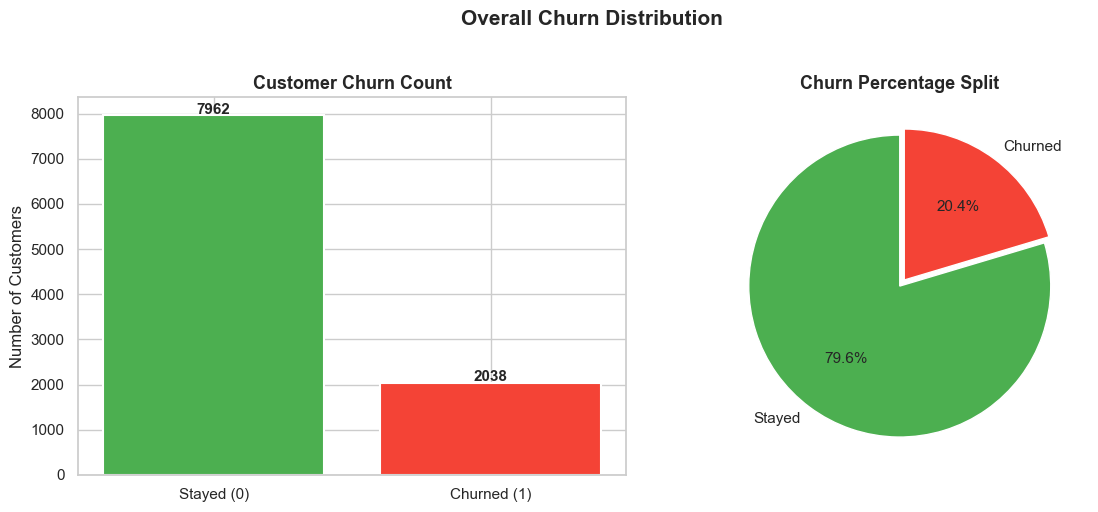

Stayed : 7962 (79.6%)
Churned: 2038 (20.4%)
Imbalance ratio: 3.91:1


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

counts = df['Exited'].value_counts()
colors = ['#4CAF50', '#F44336']
axes[0].bar(['Stayed (0)', 'Churned (1)'], counts.values, color=colors, edgecolor='white', linewidth=1.5)
axes[0].set_title('Customer Churn Count', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Customers')
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 30, str(v), ha='center', fontweight='bold', fontsize=11)

axes[1].pie(
    counts.values,
    labels=['Stayed', 'Churned'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.05),
    textprops={'fontsize': 11}
)
axes[1].set_title('Churn Percentage Split', fontsize=13, fontweight='bold')

plt.suptitle('Overall Churn Distribution', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
print(f'Stayed : {counts[0]} ({counts[0]/len(df)*100:.1f}%)')
print(f'Churned: {counts[1]} ({counts[1]/len(df)*100:.1f}%)')
print(f'Imbalance ratio: {counts[0]/counts[1]:.2f}:1')


## Plot 2 — Age vs Churn
Does age affect whether a customer churns?

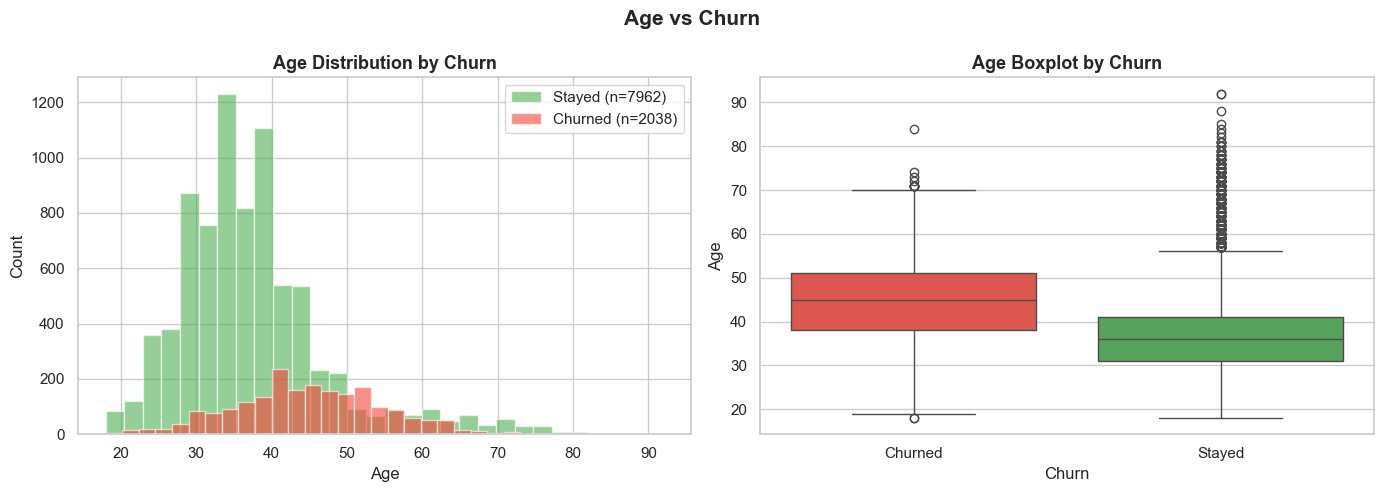

Average age — Stayed : 37.4
Average age — Churned: 44.8


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, color in [(0, '#4CAF50'), (1, '#F44336')]:
    subset = df[df['Exited'] == label]['Age']
    axes[0].hist(subset, bins=30, alpha=0.6, color=color,
                 label=f"{'Stayed' if label==0 else 'Churned'} (n={len(subset)})",
                 edgecolor='white')
axes[0].set_title('Age Distribution by Churn', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend()

sns.boxplot(data=df_plot, x='Churn', y='Age',
            palette={'Stayed': '#4CAF50', 'Churned': '#F44336'}, ax=axes[1])
axes[1].set_title('Age Boxplot by Churn', fontsize=13, fontweight='bold')

plt.suptitle('Age vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
print('Average age — Stayed :', round(df[df['Exited']==0]['Age'].mean(), 1))
print('Average age — Churned:', round(df[df['Exited']==1]['Age'].mean(), 1))


## Plot 3 — Account Balance vs Churn
Do customers with higher balance churn more?

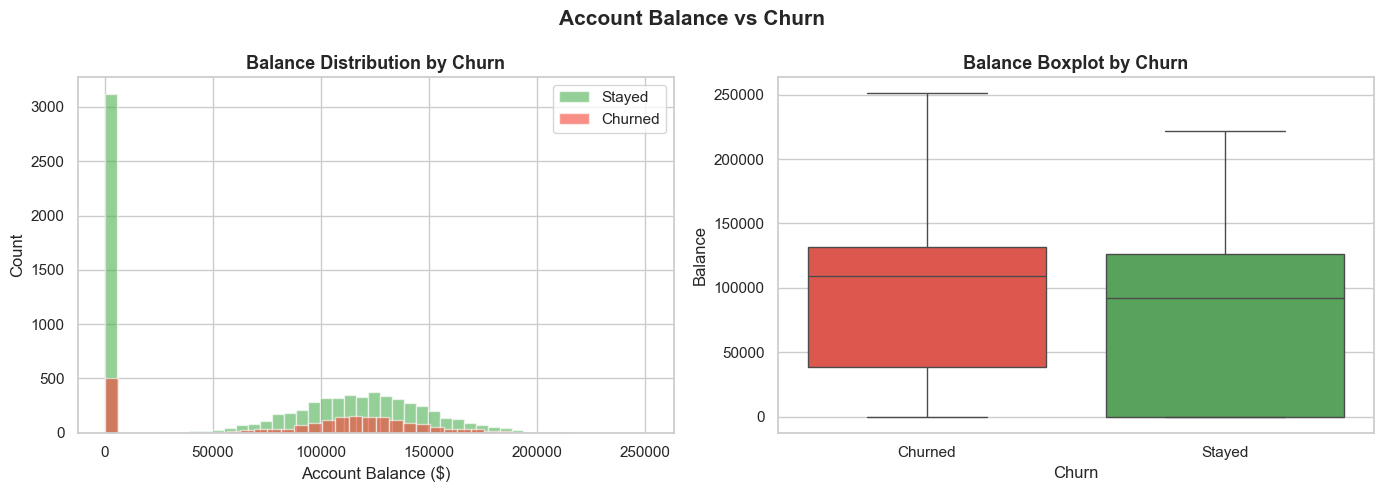

Average balance — Stayed : 72742.75
Average balance — Churned: 91109.48


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, color in [(0, '#4CAF50'), (1, '#F44336')]:
    subset = df[df['Exited'] == label]['Balance']
    axes[0].hist(subset, bins=40, alpha=0.6, color=color,
                 label=f"{'Stayed' if label==0 else 'Churned'}",
                 edgecolor='white')
axes[0].set_title('Balance Distribution by Churn', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Account Balance ($)')
axes[0].set_ylabel('Count')
axes[0].legend()

sns.boxplot(data=df_plot, x='Churn', y='Balance',
            palette={'Stayed': '#4CAF50', 'Churned': '#F44336'}, ax=axes[1])
axes[1].set_title('Balance Boxplot by Churn', fontsize=13, fontweight='bold')

plt.suptitle('Account Balance vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
print('Average balance — Stayed :', round(df[df['Exited']==0]['Balance'].mean(), 2))
print('Average balance — Churned:', round(df[df['Exited']==1]['Balance'].mean(), 2))


## Plot 4 — Credit Score vs Churn
Does credit score influence churn?

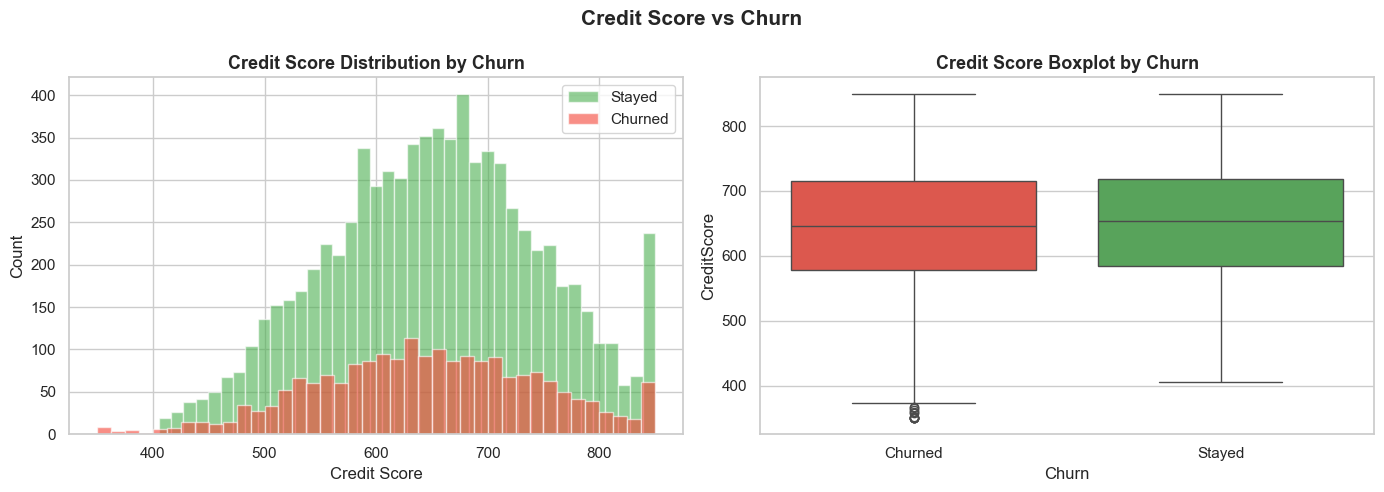

Average credit score — Stayed : 651.8
Average credit score — Churned: 645.4


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, color in [(0, '#4CAF50'), (1, '#F44336')]:
    subset = df[df['Exited'] == label]['CreditScore']
    axes[0].hist(subset, bins=40, alpha=0.6, color=color,
                 label=f"{'Stayed' if label==0 else 'Churned'}",
                 edgecolor='white')
axes[0].set_title('Credit Score Distribution by Churn', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Count')
axes[0].legend()

sns.boxplot(data=df_plot, x='Churn', y='CreditScore',
            palette={'Stayed': '#4CAF50', 'Churned': '#F44336'}, ax=axes[1])
axes[1].set_title('Credit Score Boxplot by Churn', fontsize=13, fontweight='bold')

plt.suptitle('Credit Score vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
print('Average credit score — Stayed :', round(df[df['Exited']==0]['CreditScore'].mean(), 1))
print('Average credit score — Churned:', round(df[df['Exited']==1]['CreditScore'].mean(), 1))


## Plot 5 — Number of Products vs Churn
Do customers with more products stay longer?

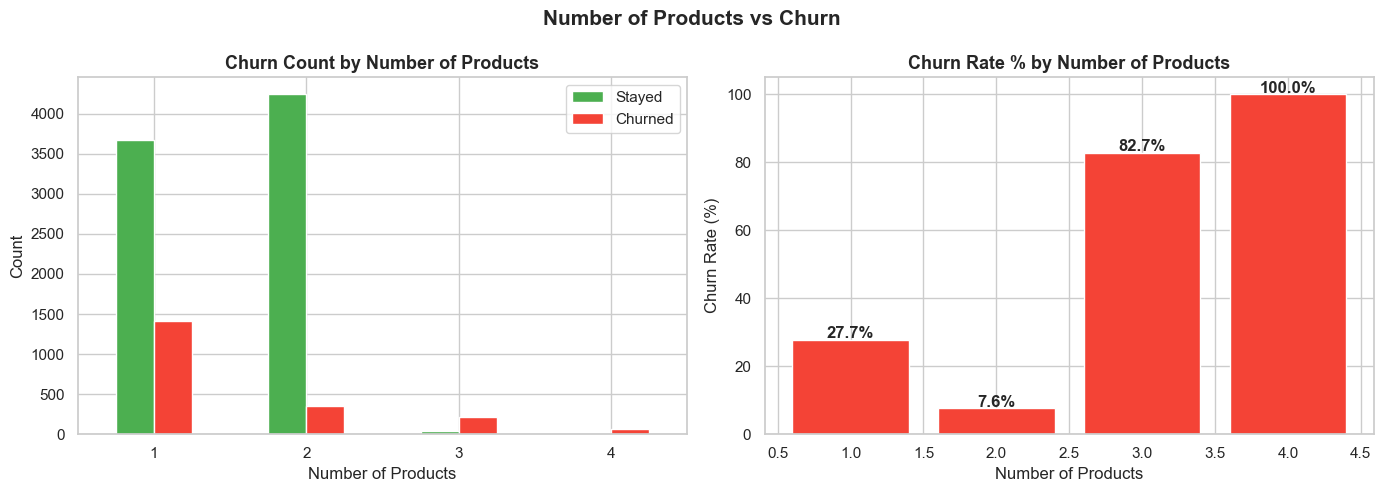

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

prod_churn = df.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)
prod_churn.columns = ['Stayed', 'Churned']
prod_churn.plot(kind='bar', ax=axes[0], color=['#4CAF50', '#F44336'],
                edgecolor='white', rot=0)
axes[0].set_title('Churn Count by Number of Products', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Number of Products')
axes[0].set_ylabel('Count')
axes[0].legend()

churn_rate = df.groupby('NumOfProducts')['Exited'].mean() * 100
axes[1].bar(churn_rate.index, churn_rate.values, color='#F44336', edgecolor='white')
axes[1].set_title('Churn Rate % by Number of Products', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Number of Products')
axes[1].set_ylabel('Churn Rate (%)')
for i, v in enumerate(churn_rate.values):
    axes[1].text(churn_rate.index[i], v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.suptitle('Number of Products vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


## Plot 6 — Tenure vs Churn
Does how long a customer has been with the bank affect churn?

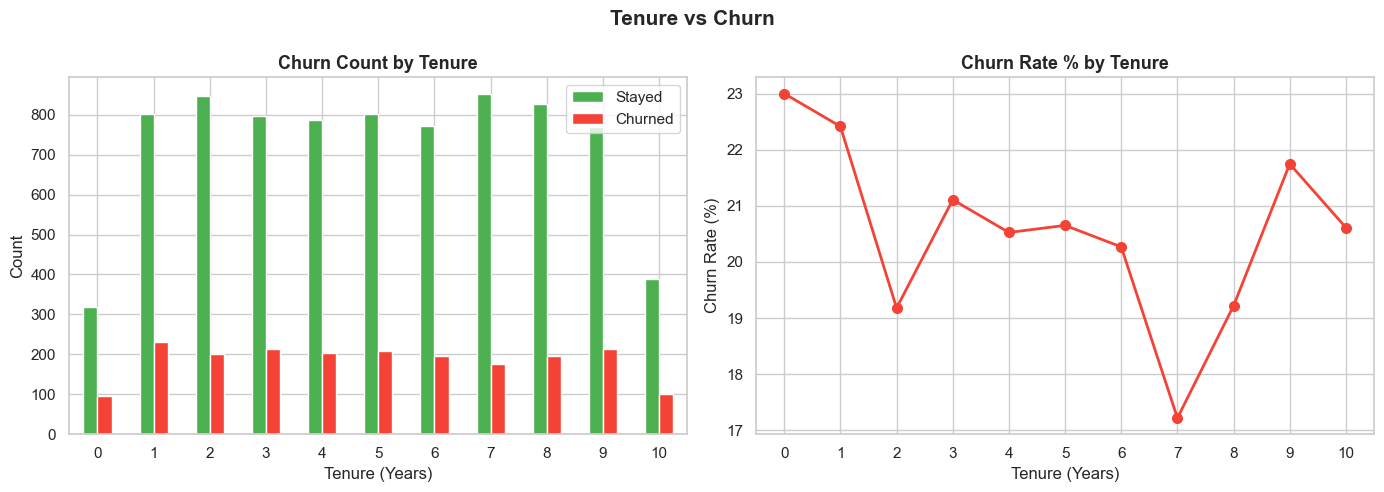

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

tenure_churn = df.groupby(['Tenure', 'Exited']).size().unstack(fill_value=0)
tenure_churn.columns = ['Stayed', 'Churned']
tenure_churn.plot(kind='bar', ax=axes[0], color=['#4CAF50', '#F44336'],
                  edgecolor='white', rot=0)
axes[0].set_title('Churn Count by Tenure', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Tenure (Years)')
axes[0].set_ylabel('Count')
axes[0].legend()

tenure_rate = df.groupby('Tenure')['Exited'].mean() * 100
axes[1].plot(tenure_rate.index, tenure_rate.values,
             marker='o', color='#F44336', linewidth=2, markersize=7)
axes[1].set_title('Churn Rate % by Tenure', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Tenure (Years)')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xticks(tenure_rate.index)

plt.suptitle('Tenure vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


## Plot 7 — Active Member & Credit Card vs Churn
Are inactive members more likely to churn?

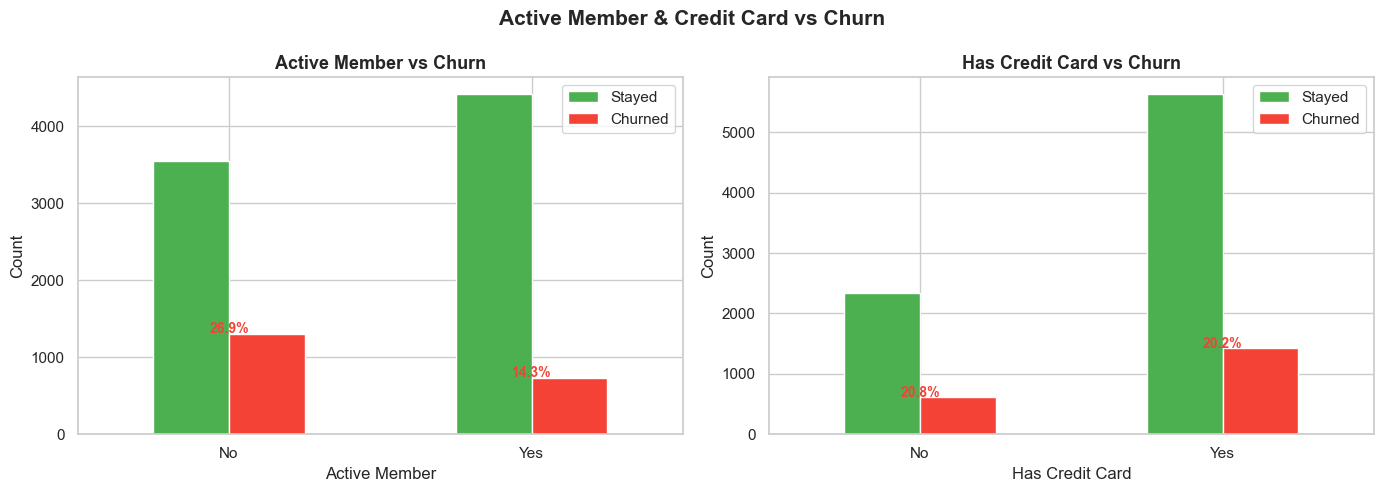

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, col, title in [
    (axes[0], 'IsActiveMember', 'Active Member'),
    (axes[1], 'HasCrCard',      'Has Credit Card')
]:
    data = df.groupby([col, 'Exited']).size().unstack(fill_value=0)
    data.columns = ['Stayed', 'Churned']
    data.index = ['No', 'Yes']
    data.plot(kind='bar', ax=ax, color=['#4CAF50', '#F44336'],
              edgecolor='white', rot=0)
    ax.set_title(f'{title} vs Churn', fontsize=13, fontweight='bold')
    ax.set_xlabel(title)
    ax.set_ylabel('Count')
    ax.legend()
    for i, (idx, row) in enumerate(data.iterrows()):
        rate = row['Churned'] / (row['Stayed'] + row['Churned']) * 100
        ax.text(i, row['Churned'] + 10, f'{rate:.1f}%', ha='center',
                fontweight='bold', color='#F44336', fontsize=10)

plt.suptitle('Active Member & Credit Card vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


## Plot 8 — Satisfaction Score vs Churn
Does lower satisfaction lead to churn?

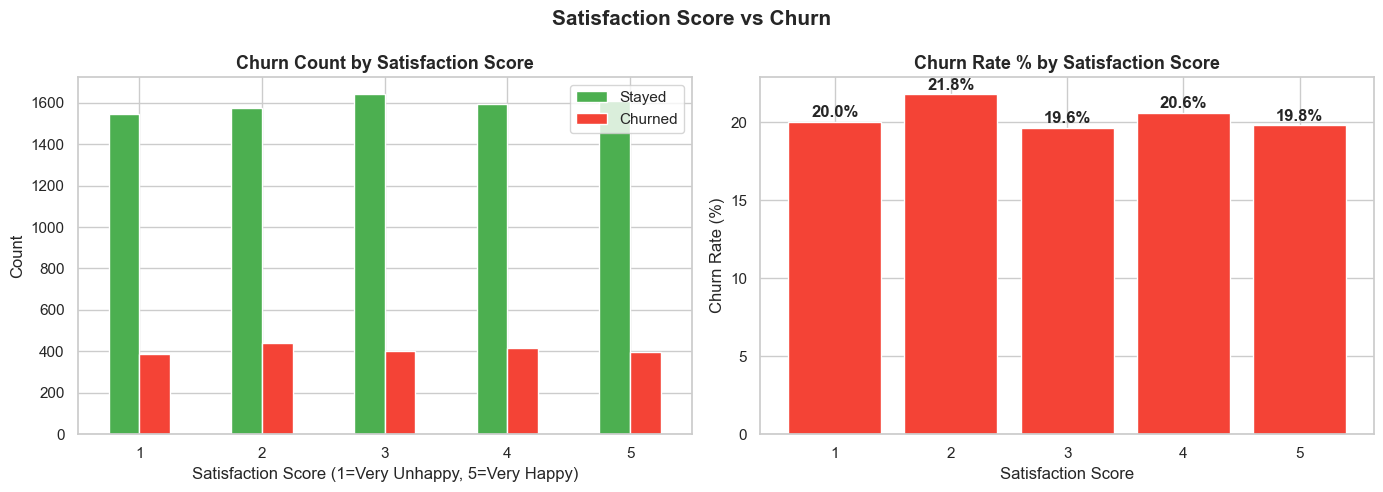

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sat_churn = df.groupby(['Satisfaction Score', 'Exited']).size().unstack(fill_value=0)
sat_churn.columns = ['Stayed', 'Churned']
sat_churn.plot(kind='bar', ax=axes[0], color=['#4CAF50', '#F44336'],
               edgecolor='white', rot=0)
axes[0].set_title('Churn Count by Satisfaction Score', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Satisfaction Score (1=Very Unhappy, 5=Very Happy)')
axes[0].set_ylabel('Count')
axes[0].legend()

sat_rate = df.groupby('Satisfaction Score')['Exited'].mean() * 100
axes[1].bar(sat_rate.index, sat_rate.values, color='#F44336', edgecolor='white')
axes[1].set_title('Churn Rate % by Satisfaction Score', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Satisfaction Score')
axes[1].set_ylabel('Churn Rate (%)')
for i, v in enumerate(sat_rate.values):
    axes[1].text(sat_rate.index[i], v + 0.3, f'{v:.1f}%', ha='center', fontweight='bold')

plt.suptitle('Satisfaction Score vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


## Plot 9 — Points Earned vs Churn
Do reward points keep customers from leaving?

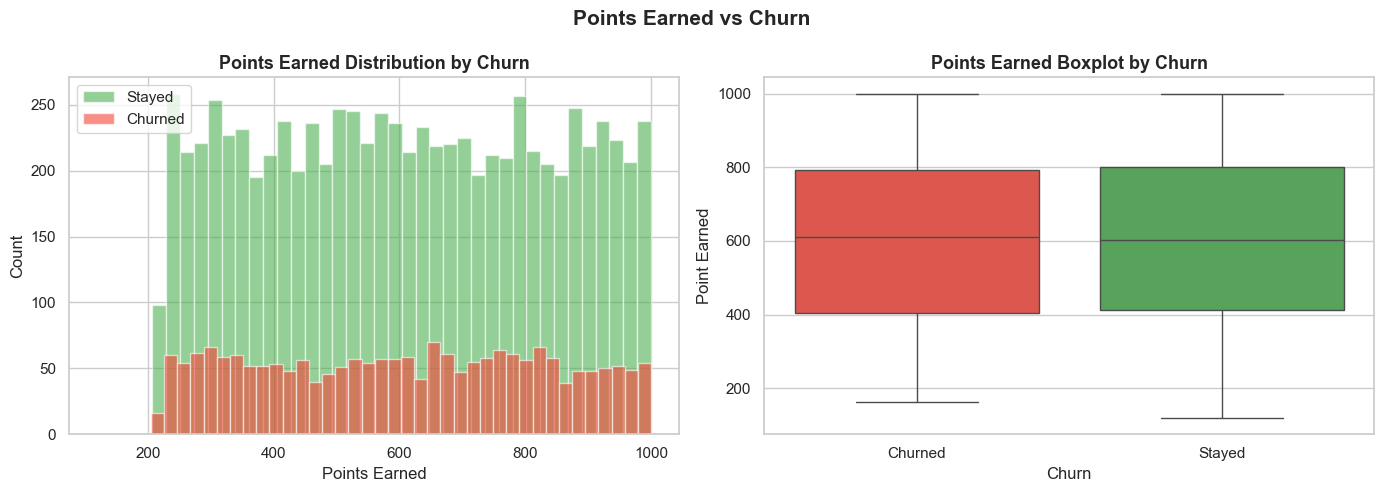

Avg points — Stayed : 607.0
Avg points — Churned: 604.4


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, color in [(0, '#4CAF50'), (1, '#F44336')]:
    subset = df[df['Exited'] == label]['Point Earned']
    axes[0].hist(subset, bins=40, alpha=0.6, color=color,
                 label=f"{'Stayed' if label==0 else 'Churned'}",
                 edgecolor='white')
axes[0].set_title('Points Earned Distribution by Churn', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Points Earned')
axes[0].set_ylabel('Count')
axes[0].legend()

sns.boxplot(data=df_plot, x='Churn', y='Point Earned',
            palette={'Stayed': '#4CAF50', 'Churned': '#F44336'}, ax=axes[1])
axes[1].set_title('Points Earned Boxplot by Churn', fontsize=13, fontweight='bold')

plt.suptitle('Points Earned vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()
print('Avg points — Stayed :', round(df[df['Exited']==0]['Point Earned'].mean(), 1))
print('Avg points — Churned:', round(df[df['Exited']==1]['Point Earned'].mean(), 1))


## Plot 10 — Estimated Salary vs Churn
Does salary affect churn?

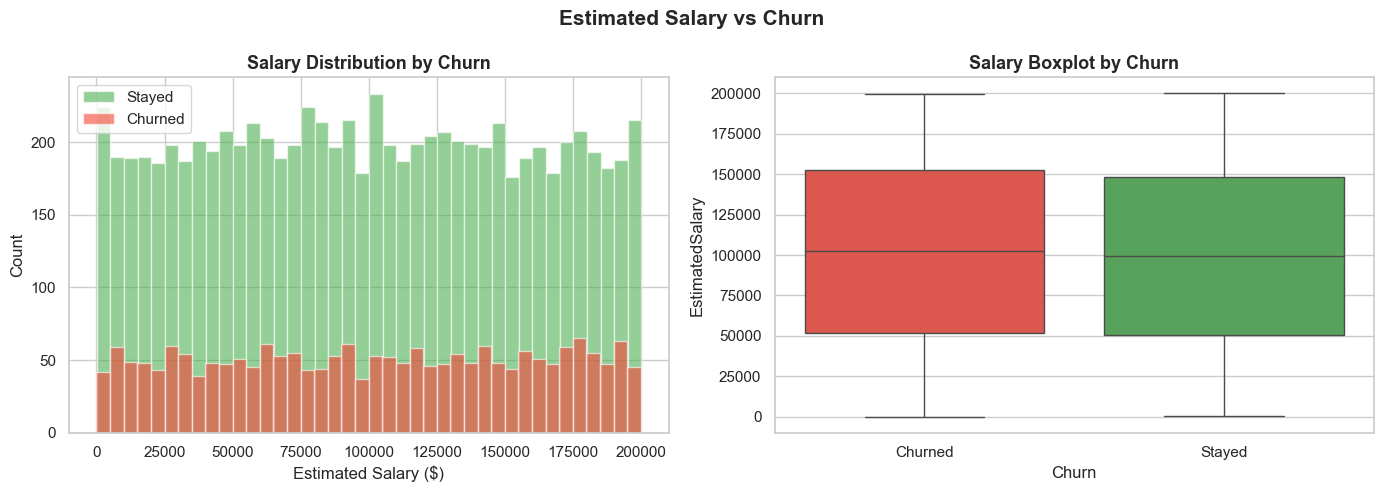

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, color in [(0, '#4CAF50'), (1, '#F44336')]:
    subset = df[df['Exited'] == label]['EstimatedSalary']
    axes[0].hist(subset, bins=40, alpha=0.6, color=color,
                 label=f"{'Stayed' if label==0 else 'Churned'}",
                 edgecolor='white')
axes[0].set_title('Salary Distribution by Churn', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Estimated Salary ($)')
axes[0].set_ylabel('Count')
axes[0].legend()

sns.boxplot(data=df_plot, x='Churn', y='EstimatedSalary',
            palette={'Stayed': '#4CAF50', 'Churned': '#F44336'}, ax=axes[1])
axes[1].set_title('Salary Boxplot by Churn', fontsize=13, fontweight='bold')

plt.suptitle('Estimated Salary vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()


## Summary — Key Insights

In [14]:
print('=' * 55)
print('KEY INSIGHTS FROM EDA')
print('=' * 55)

churn_rate      = df['Exited'].mean() * 100
avg_age_stayed  = df[df['Exited']==0]['Age'].mean()
avg_age_churned = df[df['Exited']==1]['Age'].mean()
avg_bal_stayed  = df[df['Exited']==0]['Balance'].mean()
avg_bal_churned = df[df['Exited']==1]['Balance'].mean()
active_churn    = df[df['IsActiveMember']==0]['Exited'].mean() * 100
inactive_churn  = df[df['IsActiveMember']==1]['Exited'].mean() * 100

print(f'Overall churn rate          : {churn_rate:.1f}%')
print(f'Avg age (Stayed / Churned)  : {avg_age_stayed:.1f} / {avg_age_churned:.1f}')
print(f'Avg balance (Stayed/Churned): ${avg_bal_stayed:,.0f} / ${avg_bal_churned:,.0f}')
print(f'Churn rate inactive members : {active_churn:.1f}%')
print(f'Churn rate active members   : {inactive_churn:.1f}%')
print('=' * 55)
print('Older customers churn more')
print('Higher balance customers churn more')
print('Inactive members churn significantly more')
print('Products 3 and 4 have very high churn rates')
print('Satisfaction score does not strongly separate churn')
print('=' * 55)


KEY INSIGHTS FROM EDA
Overall churn rate          : 20.4%
Avg age (Stayed / Churned)  : 37.4 / 44.8
Avg balance (Stayed/Churned): $72,743 / $91,109
Churn rate inactive members : 26.9%
Churn rate active members   : 14.3%
Older customers churn more
Higher balance customers churn more
Inactive members churn significantly more
Products 3 and 4 have very high churn rates
Satisfaction score does not strongly separate churn
